<a href="https://colab.research.google.com/github/JuanCamilo18/MM_Datos/blob/main/Evaluacion_MR01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Entrenamiento y evaluación de modelos de regresión** 

## ¿Qué es la regresión?

La regresión consiste en establecer una relación entre las variables de los datos que representan propiedades (conocidas como características) de lo que se está observando y la variable que se está intentando predecir (conocida como etiqueta). Recuerde nuestra empresa que alquila bicicletas y quiere predecir el número esperado de alquileres en un día determinado. En este caso, las características incluyen cosas como el día de la semana, el mes, etc., y la etiqueta es el número de alquileres de bicicletas.

Para entrenar el modelo, comenzamos con una muestra de datos que contiene las características, así como los valores conocidos de la etiqueta, por lo que, en este caso, necesitamos datos históricos que incluyan fechas, condiciones meteorológicas y el número de alquileres de bicicletas.

A continuación, esta muestra de datos se divide en dos subconjuntos:

- Un conjunto de datos de entrenamiento al que aplicaremos un algoritmo que determina una función que encapsula la relación entre los valores de las características y los valores de etiqueta conocidos.
- Un conjunto de datos de validación o de prueba que se puede usar para evaluar el modelo mediante su uso para generar predicciones para la etiqueta y su comparación con los valores de etiqueta conocidos reales.

El uso de datos históricos con valores de etiqueta conocidos para entrenar un modelo hace que la regresión sea un ejemplo de aprendizaje automático supervisado.

### **Un ejemplo sencillo**

Observemos un ejemplo sencillo para ver cómo funciona el proceso de entrenamiento y evaluación en principio. Simplifiquemos el escenario para que se use una sola característica, la temperatura media diaria, para predecir la etiqueta de alquileres de bicicletas.

Comenzamos con algunos datos que incluyen valores conocidos para la característica de temperatura media diaria y la etiqueta de alquileres de bicicletas.

Temperatura	| Alquileres
---|---
56 | 115
61 | 126
67 | 137
72 | 140
76 | 152
82 | 156
54 | 114
62 | 129



Ahora seleccionaremos aleatoriamente cinco de estas observaciones y las usaremos para entrenar un modelo de regresión. Cuando hablamos de "entrenar un modelo", lo que queremos decir es encontrar una función (una ecuación matemática; vamos a llamarla **f**) que puede usar la característica de temperatura (a la que llamaremos **x**) para calcular el número de alquileres (que llamaremos **y**). En otras palabras, tenemos que definir la función siguiente: **f(x) = y**.

Nuestro conjunto de datos de entrenamiento tiene el siguiente aspecto:

x	| y
---|---
56 | 115
61 | 126
67 | 137
72 | 140
76 | 152

Comencemos por trazar los valores de entrenamiento de x e y en un gráfico:

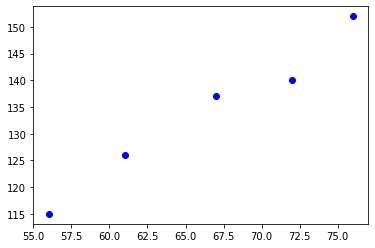

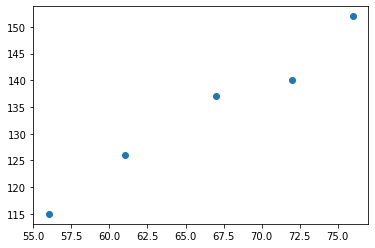

In [3]:
import matplotlib.pyplot as plt

x=[56,61,67,72,76]
y=[115,126,137,140,152]

plt.plot(x,y, "o",color="b")
plt.show()


fig, ax = plt.subplots()
ax.scatter(x,y)
plt.show()

Ahora es necesario ajustar estos valores a una función, permitiendo una cierta variación aleatoria. Probablemente pueda ver que los puntos trazados forman casi una línea recta diagonal; es decir, existe una supuesta relación lineal entre x e y, por lo que tenemos que encontrar una función lineal que se ajuste de la mejor manera a la muestra de datos. Hay varios algoritmos que se pueden usar para establecer esta función que, en definitiva, buscará una línea recta con la varianza total mínima de los puntos trazados, de este modo:

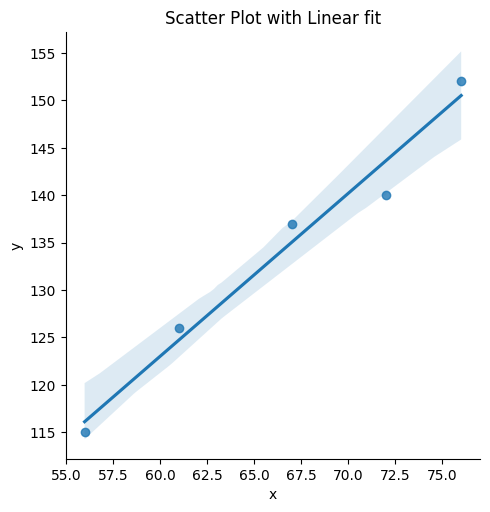

In [11]:
import seaborn as sns
import pandas as pd
df = pd.DataFrame({'x': [56,61,67,72,76],
                    'y': [115,126,137,140,152]})

#plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
sns.lmplot(x = 'x', y = 'y', data=df)
plt.title("Scatter Plot with Linear fit");

La línea representa una función lineal que se puede usar con cualquier valor de x para aplicar la pendiente de la línea y su intersección (donde la línea cruza el eje y cuando x es 0) para calcular y. En este caso, si extendiésemos la línea a la izquierda, veríamos que cuando x es 0, y es aproximadamente 20, y la pendiente de la línea es tal que para cada unidad de x que avanza hacia la derecha, y aumenta aproximadamente 1,7. Por lo tanto, la función f se puede calcular como 20 + 1,7x.

Ahora que hemos definido la función de predicción, podemos usarla para predecir las etiquetas para los datos de validación que retuvimos y comparar los valores de predicción (lo que normalmente se indica con el símbolo ŷ, o "y con acento circunflejo") con los valores de y conocidos reales.

x	| y |	ŷ
---|---|---
82 |	156 |	159,4
54 |	114	| 111,8
62 |	129	| 125,4

Veamos la comparación de los valores de y e ŷ en un trazado:

Los puntos trazados que se encuentran en la línea de función son los valores de ŷ predichos calculados por la función, y los otros puntos trazados son los valores de y reales.

Hay varias maneras de medir la varianza entre los valores predichos y los reales, y podemos usar estas métricas para evaluar el grado de predicción del modelo.

Una de las formas más comunes de medir la pérdida es elevar al cuadrado los residuales individuales, sumar los cuadrados y calcular la media. Elevar el valor residual al cuadrado tiene el efecto de basar el cálculo en valores absolutos (sin hacer caso a si la diferencia es negativa o positiva) y dar mayor ponderación a las diferencias más grandes. Esta métrica se denomina error cuadrático medio.

En el caso de los datos de validación, el cálculo tiene el siguiente aspecto:

s	| ŷ	| y - ŷ	|(y - ŷ)2
-- | -- | -- | --
156	| 159,4 |	-3,4 | 11,56
114	| 111,8	| 2.2	| 4.84
129	| 125,4	| 3.6	| 12,96
    | Sum	  | ∑	  | 29,36
    | Media	| x̄   | 9,79

Por lo tanto, la pérdida del modelo basada en la métrica del ECM es de 9,79.

¿Es bueno eso? Es difícil de saber porque el valor del ECM no se expresa en una unidad de medida significativa. Sabemos que cuanto menor sea el valor, menos pérdida tendrá el modelo; y, por tanto, mejor será la predicción. Esto lo convierte en una métrica útil para comparar dos modelos y encontrar el que tenga mejor rendimiento.

A veces, resulta más útil expresar la pérdida en la misma unidad de medida que el propio valor de etiqueta predicho, en este caso, el número de alquileres. Es posible hacer esto si se calcula la raíz cuadrada del ECM, lo que genera una métrica conocida, evidentemente, como **raíz del error cuadrático medio (RECM)**.

√9,79 = 3,13

Por lo tanto, la RECM del modelo indica que la pérdida está apenas por encima de 3, lo que se puede interpretar de forma flexible como que, en promedio, las predicciones incorrectas se equivocan en unos 3 alquileres.

Hay muchas otras métricas que se pueden usar para medir la pérdida en una regresión. Por ejemplo, R2 (R al cuadrado) (a veces conocido como coeficiente de determinación) es la correlación entre x e y al cuadrado. Esto genera un valor entre 0 y 1 que mide la cantidad de varianza que se puede explicar por el modelo. En general, cuanto más se acerque a 1 este valor, mejor será la predicción del modelo.



---

